In [10]:
import matplotlib.pyplot as plt
import pickle

In [11]:
with open('../results/regrets_for_w.pickle', 'rb') as f:
    regrets = pickle.load(f)

In [44]:
all_change_points = [1, 1000, 2000, 3000, 5000, 7000, 8000, 9000, 10000]

In [15]:
regrets_to_plot = {k:v for k,v in regrets.items() if k in [300, 500, 700, 1500]}

In [50]:
def plot_regrets(regret_dict, reward_change_points=(), cost_change_points=(), all_change_point_values=(),):
    fig, ax = plt.subplots(1,1, figsize=(15,8));
        
    
    
    ind_to_params = {
        # ind: (mark, color)
        0: ('x', 'navy'),
        1: ('>', 'g'),
        2: ('d','m'),
        3: ('<','k'),
        4: ('s','r'),
        5: ('o','dodgerblue'),
        6: ('^', 'goldenrod'),
    }
    
    sorted_regret_dict = {
        k:v for k,v in sorted(regret_dict.items(), key=lambda x: x[1][-1], reverse=True)
    }
    
    
    # Find out largest value. Do this first so change points appear first in the legend.
    max_vline=0
    for regret in sorted_regret_dict.values():
        max_vline=max(max_vline, max(regret))
        
    plt.vlines(
        reward_change_points, ymin=0, ymax=max_vline, alpha=0.65
    )
        
    for ind, (label, regret) in enumerate(sorted_regret_dict.items()):
        
        
        label_new = f"w={label}"
        
        mark, color = ind_to_params[ind % 7]
        line, = ax.plot(regret, label=label_new, linestyle=':', 
                marker=mark, markevery=750, markersize=11, markeredgewidth=2.5,
                fillstyle='none', color=color,
                linewidth=4.0,
               )
        
        
    extraticks = all_change_point_values
    plt.xticks(extraticks, rotation=35, fontsize=25)
    plt.yticks(fontsize=25)
    
    ax.set_xlabel("Time Step", fontsize=38)
    ax.set_ylabel('Cumulative Regret', fontsize=38)
    
    plt.legend(prop={'size': 24}, ncol=1);
    
    plt.savefig('nursery_window_regret.pdf', bbox_inches='tight')
    
    plt.show();

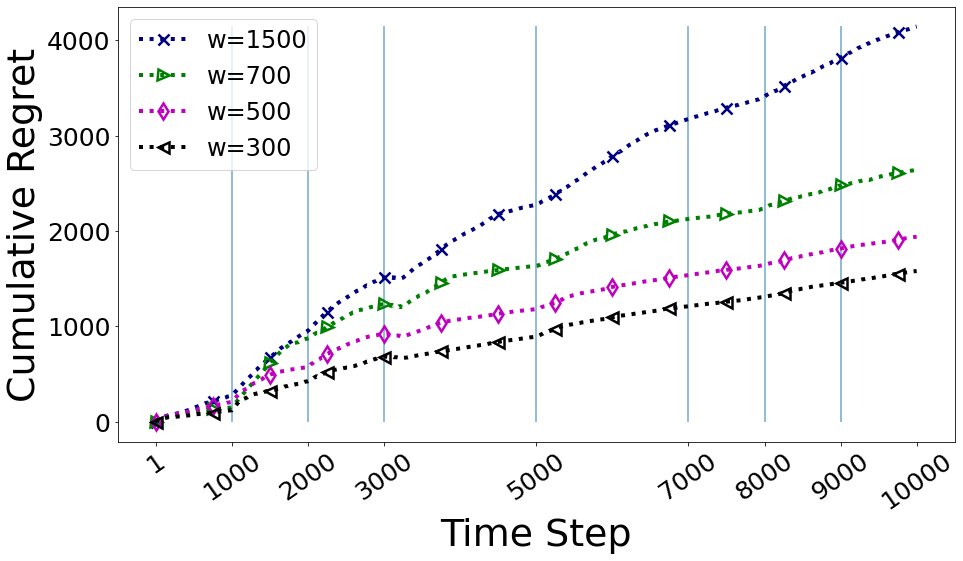

In [51]:
plot_regrets(
    regrets_to_plot,
    reward_change_points=all_change_points[1:-1],
    cost_change_points=all_change_points,
    all_change_point_values=all_change_points,
)
